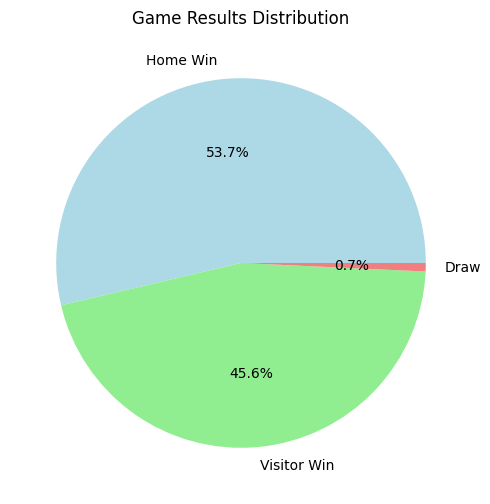

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('E:\Code_Space\大数据技术\大作业\Dataset\games.csv')

# 计算比赛结果：主队获胜、客队获胜或平局
data['Result'] = data.apply(lambda row: 'Home Win' if row['homeFinalScore'] > row['visitorFinalScore']
                            else 'Visitor Win' if row['homeFinalScore'] < row['visitorFinalScore']
                            else 'Draw', axis=1)

# 创建比赛结果分布统计图（饼图）
result_counts = data['Result'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Game Results Distribution')
plt.show()


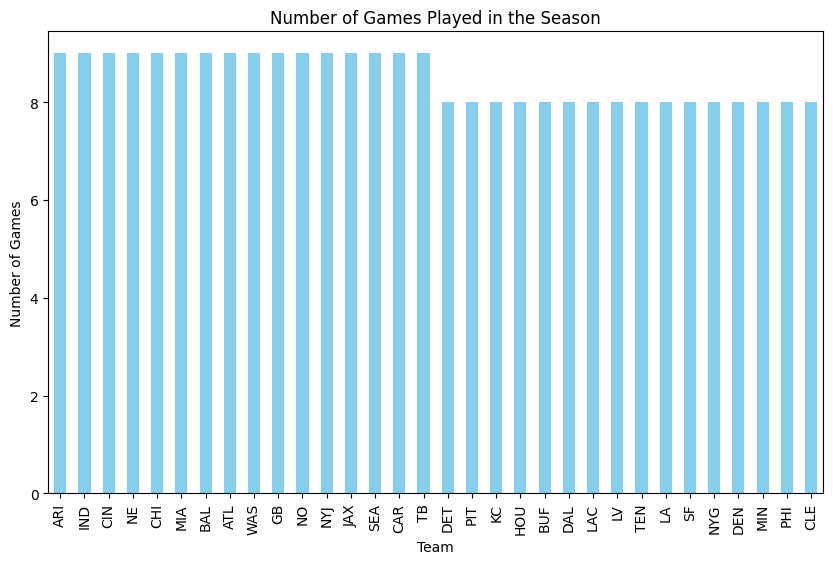

In [2]:
# 计算每支球队在整个赛季中参加的比赛数量
team_counts = pd.concat([data['homeTeamAbbr'], data['visitorTeamAbbr']]).value_counts()

# 创建赛季内比赛次数统计的柱状图
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games Played in the Season')
plt.xlabel('Team')
plt.ylabel('Number of Games')
plt.show()


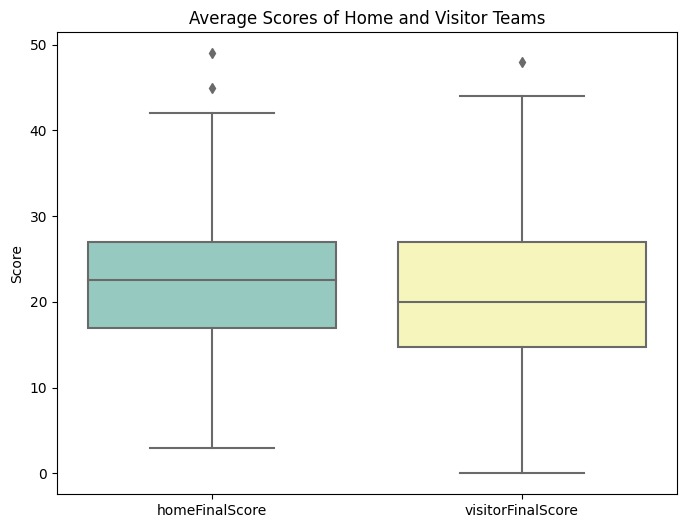

In [3]:
# 创建主队和客队的平均得分统计的箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['homeFinalScore', 'visitorFinalScore']], palette='Set3')
plt.title('Average Scores of Home and Visitor Teams')
plt.ylabel('Score')
plt.show()

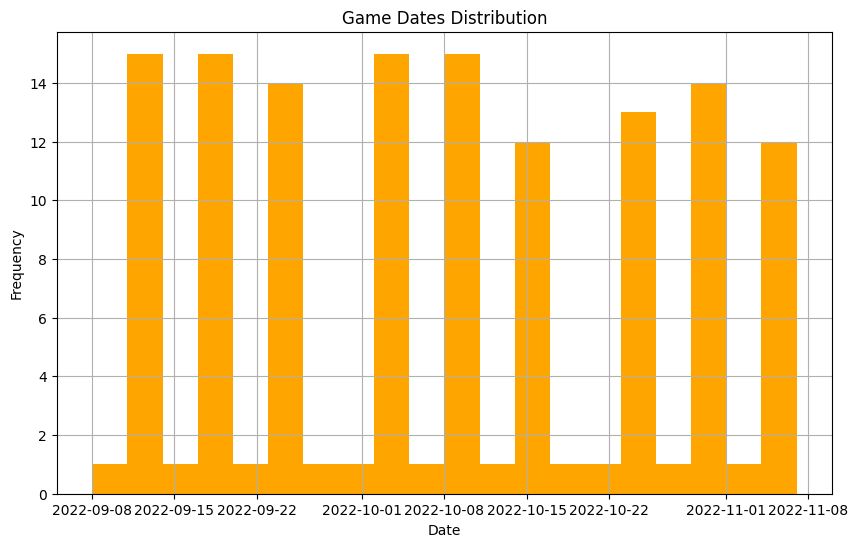

In [4]:
# 将日期转换为日期时间格式
data['gameDate'] = pd.to_datetime(data['gameDate'])

# 创建比赛日期和时间的分布情况的时间序列图表
plt.figure(figsize=(10, 6))
data['gameDate'].hist(bins=20, color='orange')
plt.title('Game Dates Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


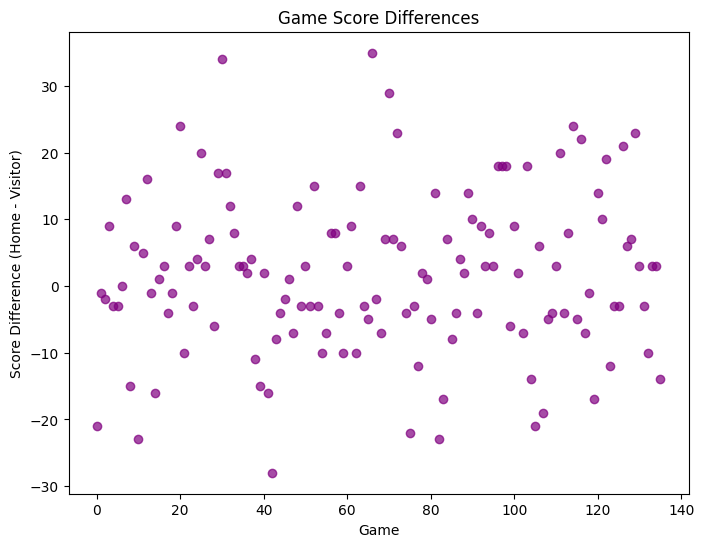

In [5]:
# 5. 比赛得分差异的分析（散点图）
data['ScoreDifference'] = data['homeFinalScore'] - data['visitorFinalScore']
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['ScoreDifference'], color='purple', alpha=0.7)
plt.title('Game Score Differences')
plt.xlabel('Game')
plt.ylabel('Score Difference (Home - Visitor)')
plt.show()

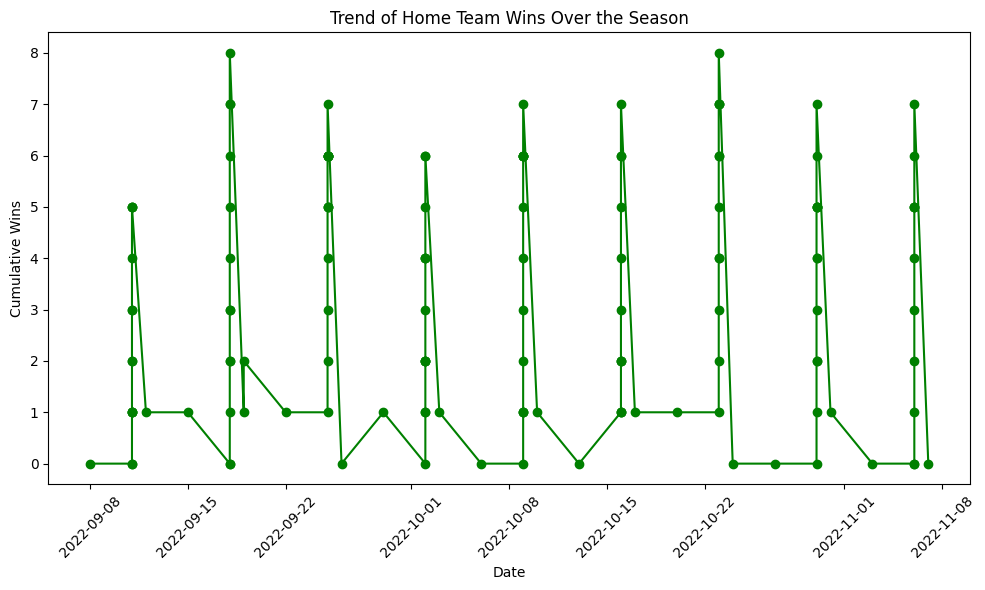

In [6]:
# 根据日期计算主队赢得比赛的数量
data['HomeWin'] = data.apply(lambda row: 1 if row['homeFinalScore'] > row['visitorFinalScore'] else 0, axis=1)
data['Date'] = pd.to_datetime(data['gameDate'])

# 按日期对主队赢得比赛的数量进行累积求和
data['CumulativeWins'] = data.groupby('Date')['HomeWin'].cumsum()

# 创建比赛结果趋势分析的折线图
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['CumulativeWins'], marker='o', color='green')
plt.title('Trend of Home Team Wins Over the Season')
plt.xlabel('Date')
plt.ylabel('Cumulative Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
